## Finding realistic adversarial examples: black-box approach

This script takes as input a classifier and a generative model and looks for 4 realistic adversarial examples.
It is a black-box approach: the inner structure of the networks (weights in particular) are not used.

In [5]:
import math
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
import time
from random import randint
%matplotlib inline

digit_origin = 8
digit_target = 3

classifier = tf.keras.models.load_model('Models/classifier_capacity1_simple.model', compile=False)
gan = tf.keras.models.load_model('Models/gan_digit8_rich.h5')

Confidence in 3 is 0.851503
time: 86.854898


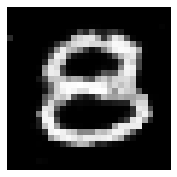

In [6]:
noise_change = 0.2

fig = plt.figure(figsize=(3, 3))

found = False

start = time.time()

while(not found):
    noise = np.random.normal(0,1,size=[1,10])
    generated_image = gan.predict(noise)
    result_origin = classifier.predict(generated_image[0].reshape(1,28,28,1))[0][digit_origin]
    if(result_origin > .9):
        result_target = classifier.predict(generated_image[0].reshape(1,28,28,1))[0][digit_target]

        for j in range(10):
            best_new_noise = noise
            best_score = result_target
            for k in range(5):
                new_noise = noise
                new_noise += np.random.normal(0,noise_change,size=[1,10]);
                new_noise = np.clip(new_noise,-1,1)
                new_generated_image = gan.predict(new_noise)
                new_result_target = classifier.predict(new_generated_image[0].reshape(1,28,28,1))[0][digit_target]
                if(new_result_target > result_target):
                    best_new_noise = new_noise
                    best_score = new_result_target
            noise = best_new_noise
            result_target = best_score

        if(result_target > .5):
            print("Confidence in %d is %f" % (digit_target,result_target))
            plt.imshow(generated_image.reshape(1,28,28)[0],cmap='gray')
            plt.axis("off")
            found = True

end = time.time()
print("time: %f s" % (end - start))

plt.savefig('adversarial_examples_black_box.png')
plt.show()